Import Dependencies

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Data

In [2]:
data = pd.read_csv(r'C:\Users\91988_226zeco\Downloads\house_pred.csv')
test = pd.read_csv(r'C:\Users\91988_226zeco\Downloads\test.csv')

Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
for i in data.columns :
  if (data[i].isnull().sum()!=0):
    print( i , data[i].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [5]:
dropped = ['Alley' , 'FireplaceQu' , 'PoolQC' , 'Fence' , 'MiscFeature']

In [6]:
data.drop(dropped , axis = 1 , inplace = True)
test.drop(dropped , axis = 1 , inplace = True)

In [7]:
for i in data.columns :
  if (data[i].isnull().sum()!=0):
    print( i , data[i].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [8]:
data.dropna(subset = ['Electrical' , 'MasVnrType' , 'MasVnrArea'] , inplace = True)

In [9]:
for i in data.columns :
  if (data[i].isnull().sum()!=0):
    print( i , data[i].isnull().sum())

LotFrontage 257
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [10]:
category = data.select_dtypes(exclude = ['int' , 'float']).columns

In [11]:
category

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
null = []
for i in category:
  if data[i].isnull().sum()!=0:
    print(i ,data[i].isnull().sum() )
    null+=[i]

BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [13]:
for i in null:
  data[i].fillna(data[i].mode()[0] , inplace = True)

In [14]:
for i in data.columns :
  if (data[i].isnull().sum()!=0):
    print( i , data[i].isnull().sum())

LotFrontage 257
GarageYrBlt 81


In [15]:
data['LotFrontage'].fillna(data['LotFrontage'].median() , inplace = True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median() , inplace = True)

In [16]:
groups = data.groupby( list(category))

In [17]:
groups['LotFrontage'].median()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  SaleCondition
C (all)   Grvl    Reg       Bnk          AllPub     Inside     Mod        IDOTRR        Norm        Norm        1Fam      1Story      Hip        CompShg   Wd Sdng      Wd Sdng      None        Fa         TA         CBlock      TA        TA        Av            Unf           Unf           GasA     TA         N           FuseA       Fa           Typ         Basment     Unf           TA          TA          N           WD        Alloca            66.0
                            Low          AllPub     Inside     Gtl        IDOTRR        Norm        Nor

In [18]:
data['LotFrontage'] = groups['LotFrontage'].transform(lambda x: x.fillna(x.median()))
data['GarageYrBlt'] = groups['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))

In [19]:
for i in data.columns :
  if (data[i].isnull().sum()!=0):
    print( i , data[i].isnull().sum())

In [20]:
numerical = data.select_dtypes(exclude = 'object').columns

In [21]:
numerical

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

C:\Users\91988_226zeco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91988_226zeco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91988_226zeco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

C:\Users\91988_226zeco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91988_226zeco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91988_226zeco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

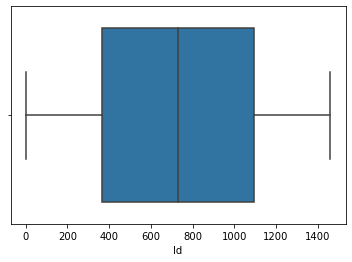

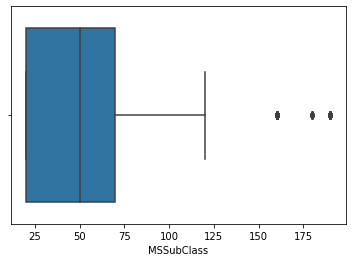

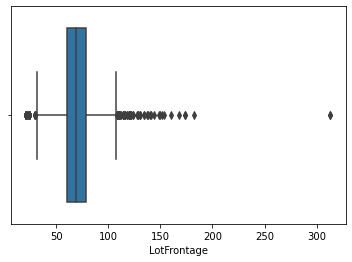

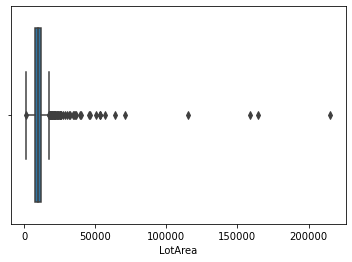

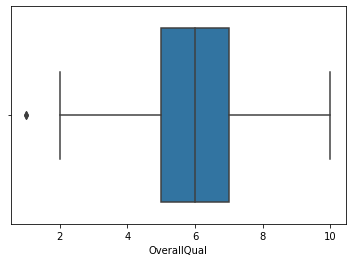

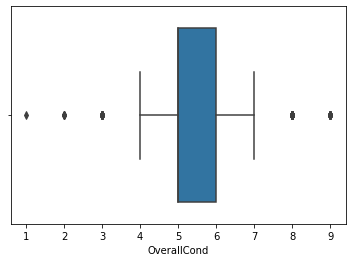

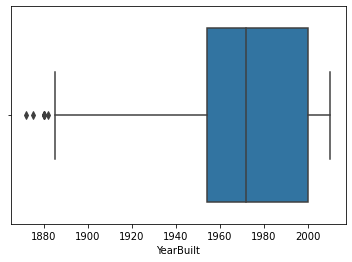

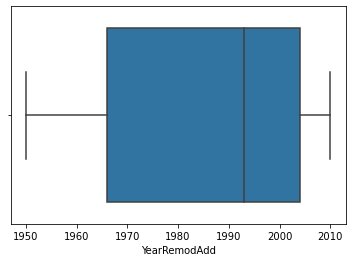

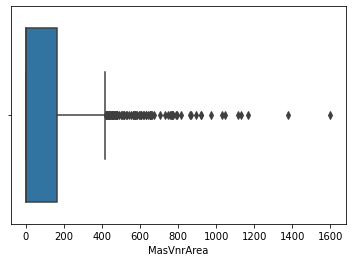

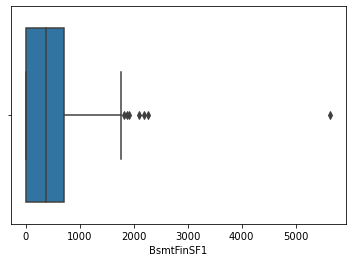

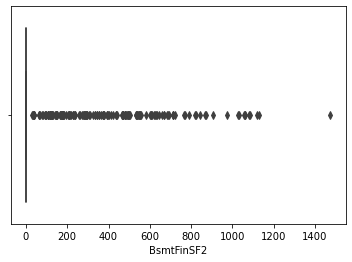

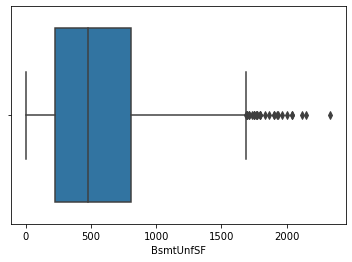

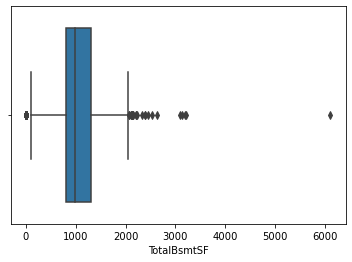

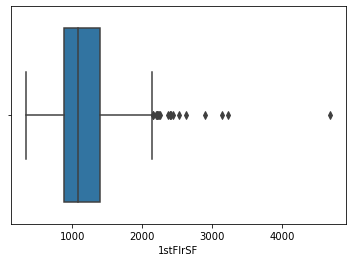

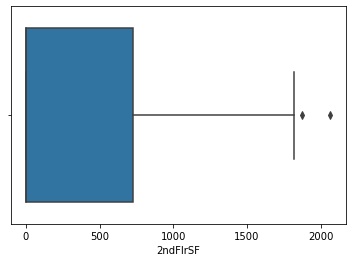

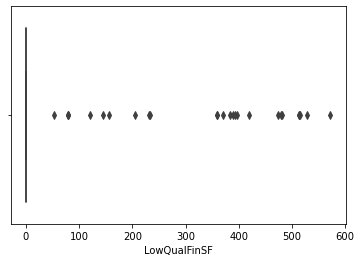

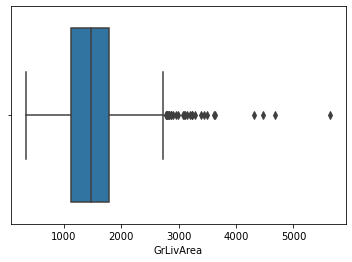

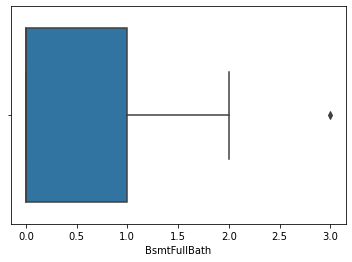

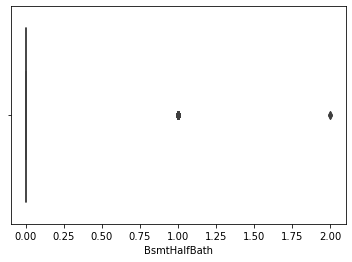

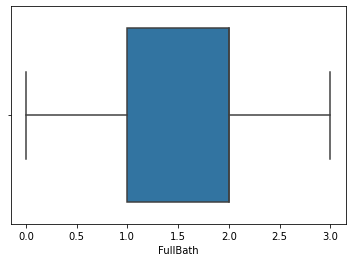

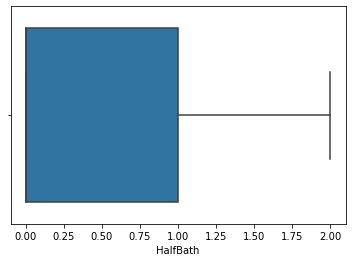

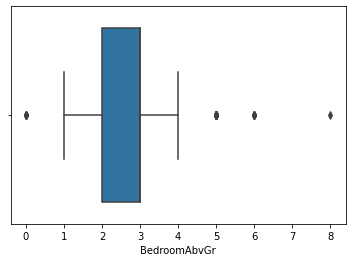

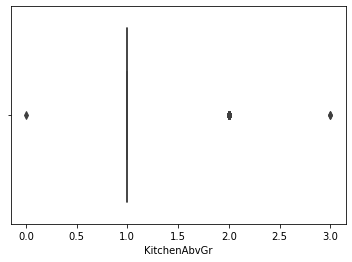

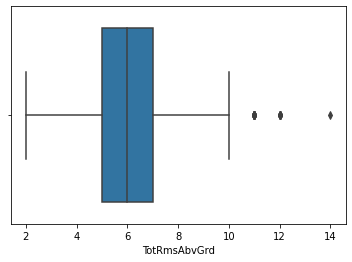

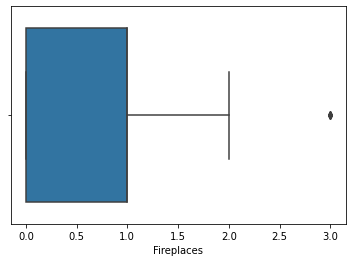

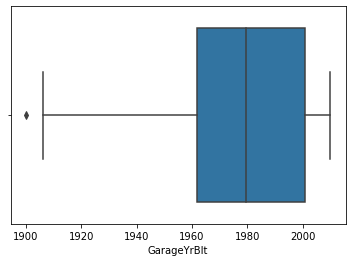

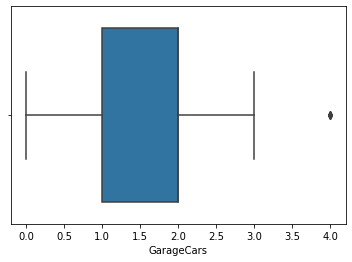

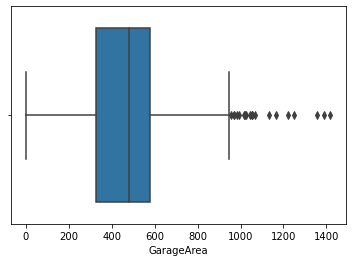

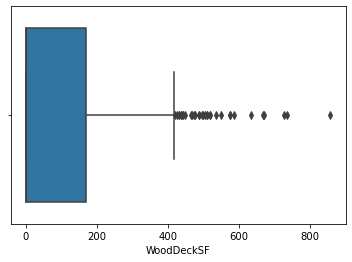

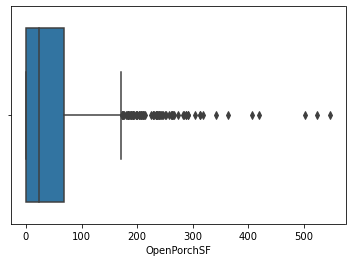

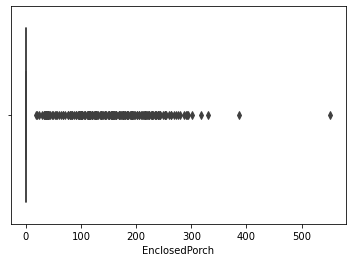

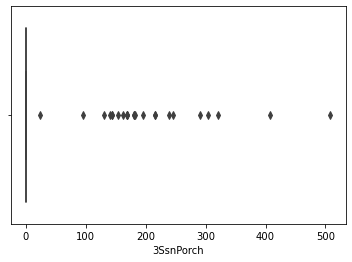

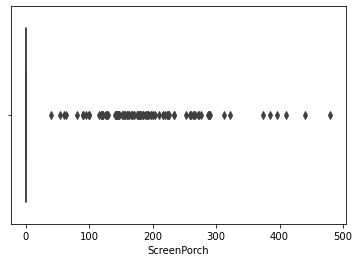

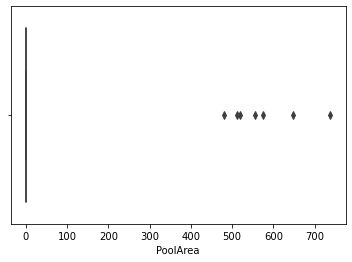

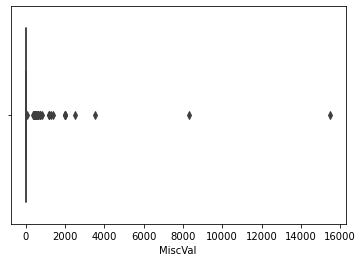

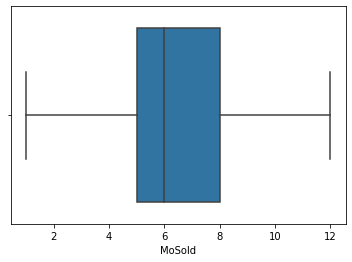

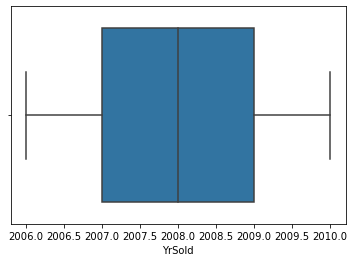

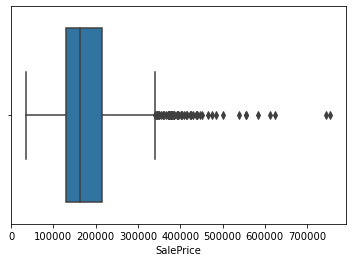

In [22]:
for i in numerical:
  plt.figure()
  sns.boxplot(data[i])

In [23]:
extreme = ['OpenPorchSF' , 'EnclosedPorch' , '3SsnPorch' , 'ScreenPorch' ]

In [24]:
data.drop(extreme , inplace = True , axis = 1)
test.drop(extreme , inplace = True , axis = 1)

In [25]:
def IQR(column , dataset = data ):
  df = dataset[column]
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  lower = q1 - (1.5 * IQR)
  upper = q3 + (1.5 * IQR)
  return lower , upper

In [26]:
numerical = data.select_dtypes(exclude = 'object').columns
category = data.select_dtypes(exclude = ['int' , 'float']).columns

In [27]:
#1
dummies_data =  pd.get_dummies(data[category] , drop_first = False)
dummies_test =  pd.get_dummies(test[category] , drop_first = False)

In [28]:
dummies_data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
dummies_test

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
252,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
253,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
254,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [30]:
l = []
for i in dummies_data.columns:
  if i not in dummies_test.columns:
    print(i)
    l+=[i]

Street_Grvl
Utilities_NoSeWa
Neighborhood_Blueste
Condition1_RRNe
Condition2_Artery
Condition2_Feedr
Condition2_PosA
Condition2_PosN
Condition2_RRAn
Condition2_RRNn
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_WdShngl
Exterior1st_AsphShn
Exterior1st_BrkComm
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_AsphShn
Exterior2nd_Brk Cmn
Exterior2nd_ImStucc
Exterior2nd_Other
ExterCond_Ex
ExterCond_Po
BsmtCond_Po
HeatingQC_Po
Electrical_FuseP
Electrical_Mix
Functional_Maj2
Functional_Sev
GarageType_2Types
GarageQual_Ex
GarageQual_Po
GarageCond_Ex
SaleType_Con
SaleType_ConLD
SaleType_ConLI
SaleType_ConLw
SaleType_Oth
SaleCondition_AdjLand


In [31]:
dummies_data.drop(l , inplace = True , axis = 1)

In [32]:
dummies = pd.get_dummies(data[category] , drop_first = False)

In [33]:
data.drop(category , axis = 1 , inplace = True)

In [34]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,2003.0,2,548,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,1976.0,2,460,298,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,2001.0,2,608,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,1998.0,3,642,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,2000.0,3,836,192,0,0,12,2008,250000


In [35]:
data = data.join(dummies_data)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [37]:
x = data.drop('SalePrice' , axis = 1)
y = data['SalePrice']

In [38]:
col = x.columns

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 229 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(31), uint8(195)
memory usage: 705.4 KB


In [40]:
vif["feature"] = list(col)
vif["Variance Inflation "] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

C:\Users\91988_226zeco\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [41]:
vif_filtered = vif[vif['Variance Inflation '] < 3]

In [42]:
vif_filtered

,feature,Variance Inflation
0,Id,1.179182
2,LotFrontage,2.469942
3,LotArea,2.993919
5,OverallCond,2.498830
8,MasVnrArea,2.971375
17,BsmtFullBath,2.869106
18,BsmtHalfBath,1.416599
24,Fireplaces,2.012079
28,WoodDeckSF,1.418273
29,PoolArea,1.499759


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
x = data[vif_filtered['feature']]
y = data['SalePrice']

In [46]:
x

,Id,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFullBath,BsmtHalfBath,Fireplaces,WoodDeckSF,PoolArea,...,MoSold,YrSold,Street_Pave,Utilities_AllPub,Condition2_Norm,RoofMatl_ClyTile,RoofMatl_Roll,RoofMatl_WdShake,Exterior2nd_Stone,SaleType_CWD
0,1,65.0,8450,5,196.0,1,0,0,0,0,...,2,2008,1,1,1,0,0,0,0,0
1,2,80.0,9600,8,0.0,0,1,1,298,0,...,5,2007,1,1,1,0,0,0,0,0
2,3,68.0,11250,5,162.0,1,0,1,0,0,...,9,2008,1,1,1,0,0,0,0,0
3,4,60.0,9550,5,0.0,1,0,1,0,0,...,2,2006,1,1,1,0,0,0,0,0
4,5,84.0,14260,5,350.0,1,0,1,192,0,...,12,2008,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,5,0.0,0,0,1,0,0,...,8,2007,1,1,1,0,0,0,0,0
1456,1457,85.0,13175,6,119.0,1,0,2,349,0,...,2,2010,1,1,1,0,0,0,0,0
1457,1458,66.0,9042,9,0.0,0,0,2,0,0,...,5,2010,1,1,1,0,0,0,0,0
1458,1459,68.0,9717,6,0.0,1,0,0,366,0,...,4,2010,1,1,1,0,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 42)

In [49]:
lr.fit(x_train , y_train )

LinearRegression()

In [50]:
y_pred = lr.predict(x_test)

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y_pred , y_test)

0.15808769644028908

In [53]:
lr.fit(x , y)#Getting more data

LinearRegression()

In [54]:
#Test

In [55]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1205,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,0,0,7,2006,WD,Normal
1,1206,20,RL,90.0,14684,Pave,IR1,Lvl,AllPub,CulDSac,...,TA,TA,Y,84,0,0,6,2009,WD,Normal
2,1207,20,RH,NaN,8900,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,0,0,11,2006,WD,Normal
3,1208,20,RL,70.0,9135,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,192,0,0,5,2006,WD,Normal
4,1209,20,RL,70.0,7763,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,0,0,10,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,0,0,8,2007,WD,Normal
252,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,349,0,0,2,2010,WD,Normal
253,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,0,2500,5,2010,WD,Normal
254,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,366,0,0,4,2010,WD,Normal


In [56]:
x.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'WoodDeckSF', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Street_Pave', 'Utilities_AllPub',
       'Condition2_Norm', 'RoofMatl_ClyTile', 'RoofMatl_Roll',
       'RoofMatl_WdShake', 'Exterior2nd_Stone', 'SaleType_CWD'],
      dtype='object')

In [57]:
category = test.select_dtypes(exclude = ['int' , 'float']).columns

In [58]:
dummies = pd.get_dummies(test[category] , drop_first = False)

In [59]:
test = test.join(dummies)

In [60]:
test.drop(category , axis = 1 , inplace = True)

In [61]:
test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1205,20,78.0,10140,5,6,1975,1975,0.0,788,...,1,0,0,0,1,0,0,0,1,0
1,1206,20,90.0,14684,7,7,1990,1991,234.0,485,...,1,0,0,0,1,0,0,0,1,0
2,1207,20,NaN,8900,4,4,1966,1966,0.0,1056,...,1,0,0,0,1,0,0,0,1,0
3,1208,20,70.0,9135,6,5,2003,2003,120.0,340,...,1,0,0,0,1,0,0,0,1,0
4,1209,20,70.0,7763,5,7,1962,1980,0.0,504,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,1,0,0,0,1,0,0,0,1,0
252,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,1,0,0,0,1,0,0,0,1,0
253,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,1,0,0,0,1,0,0,0,1,0
254,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,1,0,0,0,1,0,0,0,1,0


In [62]:
test[list(vif_filtered['feature'])].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 256 non-null    int64  
 1   LotFrontage        207 non-null    float64
 2   LotArea            256 non-null    int64  
 3   OverallCond        256 non-null    int64  
 4   MasVnrArea         254 non-null    float64
 5   BsmtFullBath       256 non-null    int64  
 6   BsmtHalfBath       256 non-null    int64  
 7   Fireplaces         256 non-null    int64  
 8   WoodDeckSF         256 non-null    int64  
 9   PoolArea           256 non-null    int64  
 10  MiscVal            256 non-null    int64  
 11  MoSold             256 non-null    int64  
 12  YrSold             256 non-null    int64  
 13  Street_Pave        256 non-null    uint8  
 14  Utilities_AllPub   256 non-null    uint8  
 15  Condition2_Norm    256 non-null    uint8  
 16  RoofMatl_ClyTile   256 non

In [63]:
answer = pd.DataFrame()

In [64]:
answer['Id'] = test['Id']

In [65]:
answer['SalePrice'] = lr.predict( test[list(vif_filtered['feature'])] )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

In [ ]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())

In [ ]:
pd.DataFrame(answer).to_csv('Answer.csv')